In [18]:
import pandas as pd

df = pd.read_csv('../completed/ds_analisis_esp.csv', index_col=0)

df.head()

,Location,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Category
Brand,,,,,,,,,,,,
Hyundai,Pune,4,41000.0,Diesel,Manual,First,19,1582,126.20,5,12.50,Mass-Market
Honda,Chennai,8,46000.0,Petrol,Manual,First,18,1199,88.70,5,4.50,Executive
Maruti,Chennai,7,87000.0,Diesel,Manual,First,20,1248,88.76,7,6.00,Entry-Level
Audi,Coimbatore,6,40670.0,Diesel,Automatic,Second,15,1968,140.80,5,17.74,Luxury
Nissan,Jaipur,6,86999.0,Diesel,Manual,First,23,1461,63.10,5,3.50,Mass-Market


In [19]:
# Configurazione stile globale
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
plt.rcParams['figure.dpi'] = 120

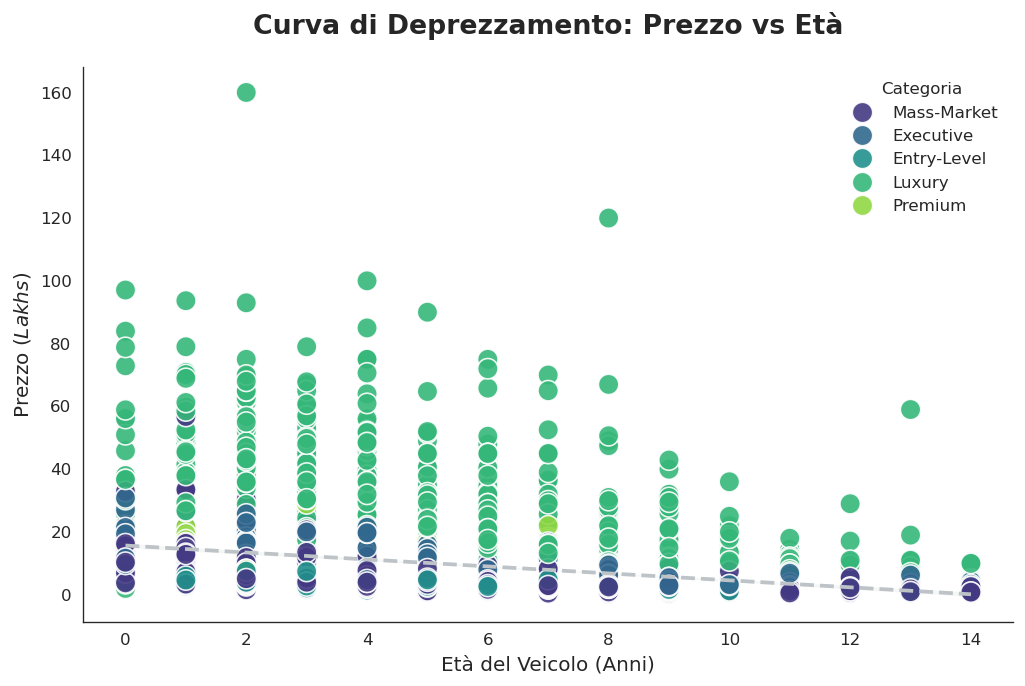

In [20]:
plt.figure(figsize=(10, 6))
# Linea di tendenza generale
sns.regplot(data=df, x='Age', y='Price', scatter=False, color='#bdc3c7', line_kws={'linestyle':'--'})
# Punti categorizzati
sns.scatterplot(data=df, x='Age', y='Price', hue='Brand_Category', s=150, alpha=0.9, palette="viridis")

plt.title("Curva di Deprezzamento: Prezzo vs Età", fontsize=16, pad=20, fontweight='bold')
plt.xlabel("Età del Veicolo (Anni)", fontsize=12)
plt.ylabel("Prezzo ($Lakhs$)", fontsize=12)
sns.despine() # Rimuove i bordi sopra e a destra
plt.legend(title="Categoria", frameon=False, bbox_to_anchor=(1, 1))
plt.show()

/tmp/ipykernel_8445/3834231033.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Brand_Category', y='Kilometers_Driven', palette="Blues_d", order=order, errorbar=None)


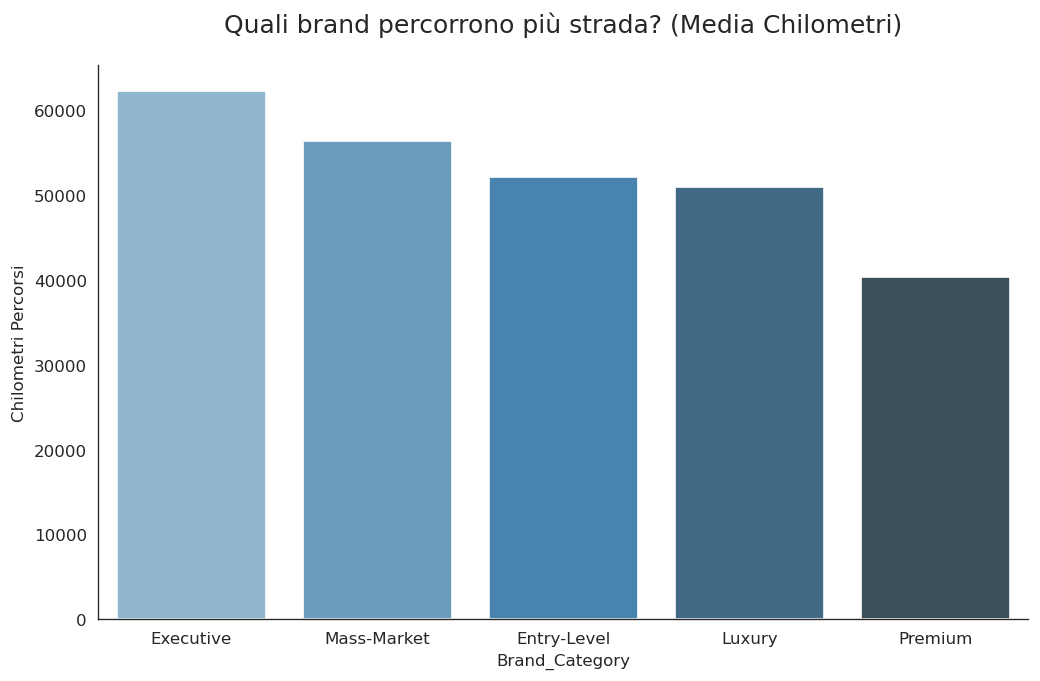

/tmp/ipykernel_8445/3834231033.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Brand_Category', y='Mileage', palette="Greens_d", order=order_m, errorbar=None)


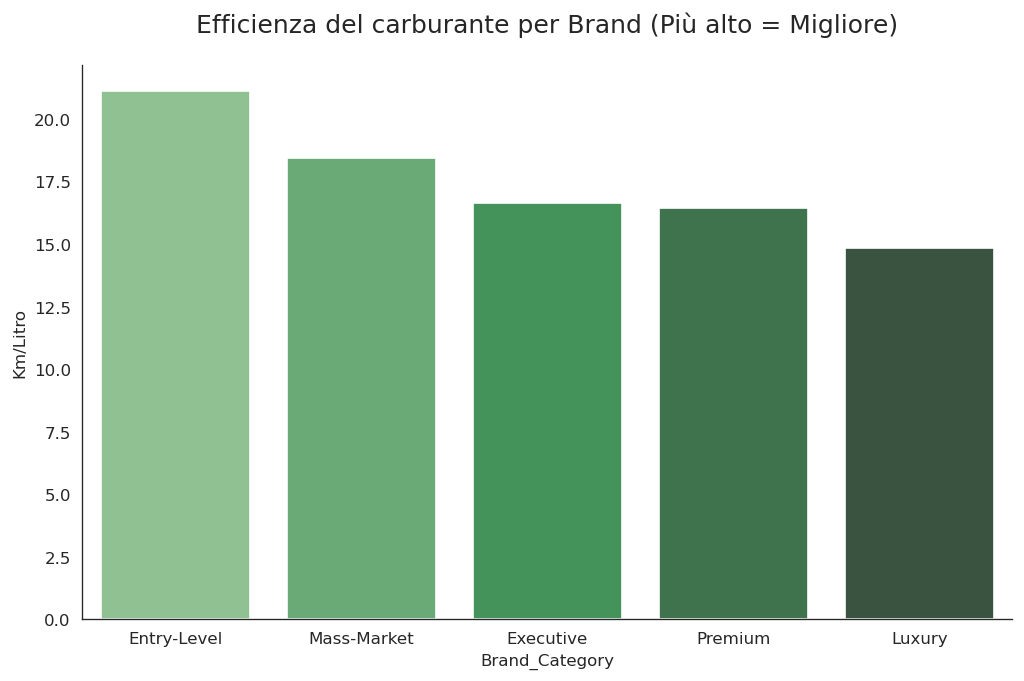

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grafico 1: Chilometri medi per Brand
plt.figure(figsize=(10, 6))
order = df.groupby('Brand_Category')['Kilometers_Driven'].mean().sort_values(ascending=False).index
sns.barplot(data=df, x='Brand_Category', y='Kilometers_Driven', palette="Blues_d", order=order, errorbar=None)
plt.title("Quali brand percorrono più strada? (Media Chilometri)", fontsize=15, pad=20)
plt.ylabel("Chilometri Percorsi")
sns.despine()
plt.show()

# Grafico 2: Efficienza (Mileage) per Brand
plt.figure(figsize=(10, 6))
order_m = df.groupby('Brand_Category')['Mileage'].mean().sort_values(ascending=False).index
sns.barplot(data=df, x='Brand_Category', y='Mileage', palette="Greens_d", order=order_m, errorbar=None)
plt.title("Efficienza del carburante per Brand (Più alto = Migliore)", fontsize=15, pad=20)
plt.ylabel("Km/Litro")
sns.despine()
plt.show()

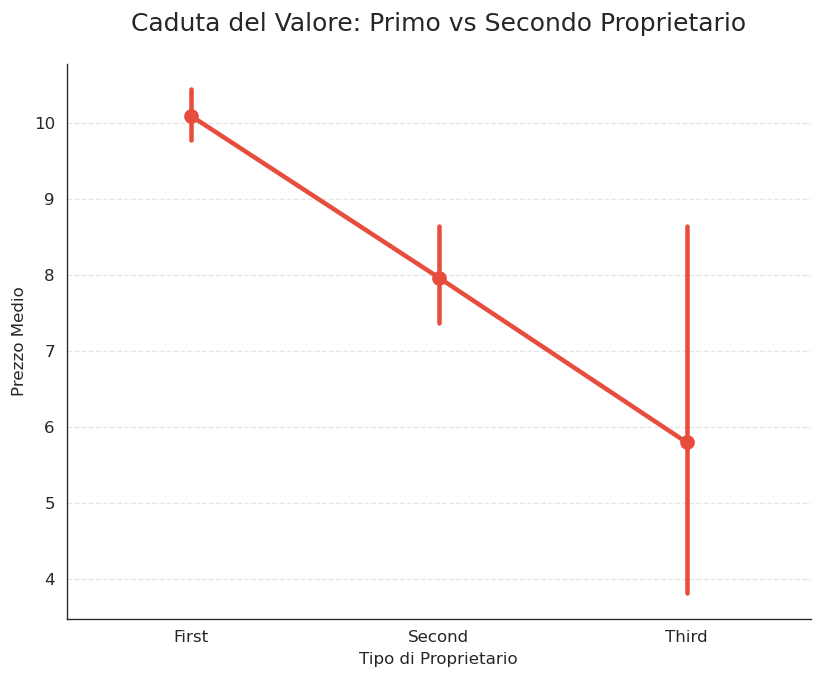

In [22]:
plt.figure(figsize=(8, 6))
# Usiamo un Pointplot per evidenziare la "caduta" del valore
sns.pointplot(data=df, x='Owner_Type', y='Price', color="#e74c3c", order=['First', 'Second', 'Third'])
plt.title("Caduta del Valore: Primo vs Secondo Proprietario", fontsize=15, pad=20)
plt.xlabel("Tipo di Proprietario")
plt.ylabel("Prezzo Medio")
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.show()

In [23]:
plt.figure(figsize=(10, 6))
# Usiamo linee di regressione: più la linea è piatta, più il brand resiste al tempo
sns.lmplot(data=df, x='Age', y='Price', hue='Brand', ci=None, height=6, aspect=1.5, scatter_kws={"s": 100})
plt.title("Resistenza all'Età: Come cala il prezzo per ogni Brand", fontsize=15, pad=20)
plt.xlabel("Età dell'auto (Anni)")
plt.ylabel("Prezzo")
plt.show()

KeyError: "['Brand'] not in index"

<Figure size 1200x720 with 0 Axes>

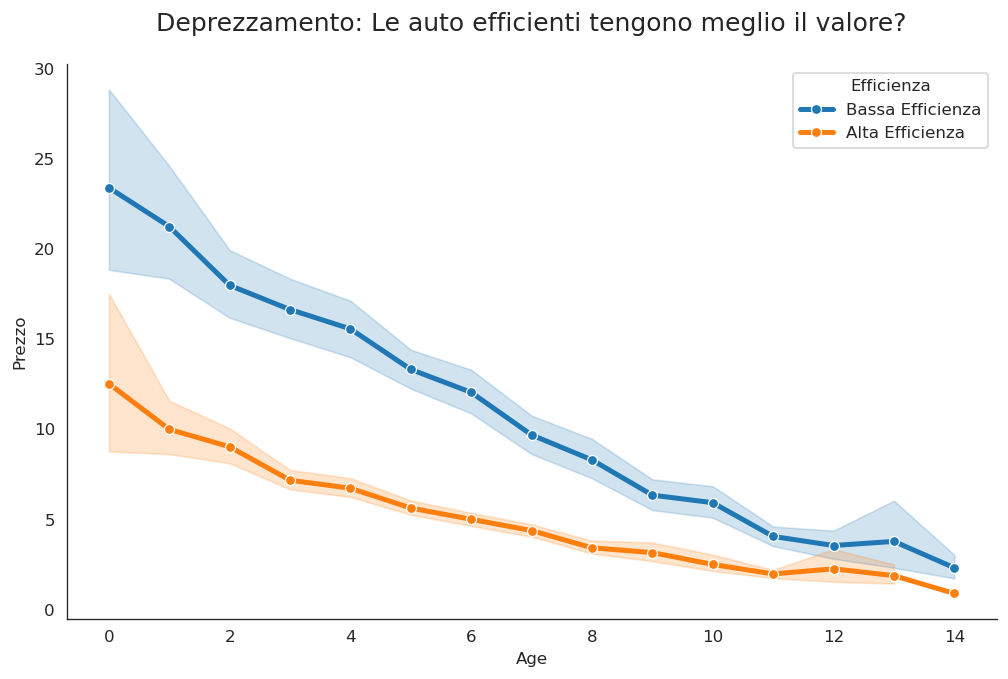

In [24]:
plt.figure(figsize=(10, 6))
# Dividiamo il mileage in categorie per renderlo leggibile (es: Alto/Basso)
df['Efficienza'] = pd.qcut(df['Mileage'], q=2, labels=['Bassa Efficienza', 'Alta Efficienza'])

sns.lineplot(data=df, x='Age', y='Price', hue='Efficienza', marker="o", linewidth=3)
plt.title("Deprezzamento: Le auto efficienti tengono meglio il valore?", fontsize=15, pad=20)
plt.ylabel("Prezzo")
sns.despine()
plt.show()